**Author:** Luca Fabbian <luca.fabbian.1999@gmail.com>.

Written during the "Operation Research 2" course, under the supervision of Professor Matteo Fischetti PhD, University of Padova, academic year 2022-2023.

# Overview
In this document, we will explore the Travelling Salesman Problem (TSP), a well-known optimization problem that is notoriously difficult to solve. Due to the problem's NP-hard nature, it's unlikely that any algorithm will be able to produce an exact solution in a reasonable amount of time for every instance. As a result, it's meaningful to focus on and study the tradeoffs between current solutions.

In this document, we will examine several popular approaches that are commonly used in the state of the art.

- First, we will introduce the problem, provide insights into our setup, and explain our methodology (Chapter 1).
- Next, we will explore some heuristic methods, such as greed (Chapter 2).
- Finally, we will leverage the CPLEX commercial solver and use techniques such as integer linear programming to find exact solutions (Chapter 3).

Throughout the document, we will provide both mathematical considerations and actual code implementations in `C++`. To make it easy for readers to follow along, relevant code snippets will be embedded directly within this document, which is generated from a Jupyter Notebook using the special `ipycpp` extension.






## Problem formulation
The Travelling Salesman Problem (TSP) can be formulated as follows: 

"given a list of nodes and the distances between each pair of nodes, the goal is to find the shortest possible route that visits each node exactly once and returns to the origin node".

In this document, we will focus on the symmetric version of the problem, which assumes that the distance between any two nodes A and B is the same as the distance between B and A.

To simplify the scenario, we will consider the nodes as bidimensional points $(x, y)$ and use the Euclidean distance formula to calculate the distance between them. Specifically, the Euclidean distance between two nodes A and B with coordinates $(x_a, y_a)$ and $(x_b, y_b)$, respectively, is given by the formula:

$$distance = \sqrt{(x_a - x_b)^2 + (y_a - y_b)^2}$$

This formulation of the problem was originally applied to finding the minimum distance tour between cities. However, the problem can also be applied to other scenarios.
The TSP has many real-world applications, including logistics, transportation, and manufacturing. For example, a delivery person or a service technician may need to visit multiple locations in a certain order while minimizing travel time and distance. The TSP can also be used to optimize the placement of components on a circuit board or to minimize the time needed for a machine to perform a set of tasks.

The problem was first introduced in the mathematical literature in the 1930s by mathematician Karl Menger and it gained popularity in the 1950s and 1960s due to the work of George Dantzig, Ray Fulkerson, and Selmer Johnson.

Despite the problem's simple formulation, the TSP is known to be NP-hard, which means that finding an optimal solution for large instances of the problem is computationally intractable. As a result, researchers have developed various approximation algorithms and heuristics to find near-optimal solutions.

The TSP continues to be an active area of research in computer science, with ongoing development and refinement of new algorithms and techniques. As a result, researchers continue to make progress in finding improved solutions for the problem, and the TSP remains a challenging and fascinating problem to study.



## Code environment

We chose `C++` as the programming language for this document, and it proved to be the wisest choice for several reasons. Firstly, `C++` is a highly efficient language, allowing us to develop a fast and optimized solution to the problem. This was essential for meeting the strict performance requirements. Secondly, `C++` plays nicely with external libraries and tools commonly used in optimization problems, such as the CPLEX solver by IBM. Additionally, `C++` is a widely used language and provides way more utilieties and quality of life improvements compared to plain `C`. Overall, choosing `C++` for this project allowed us to develop a reliable and high-performing solution within a reasonable timeframe, making it an excellent choice for our needs.


This document has been generated from a Jupyter Notebook. Jupyter Notebooks are web-based interactive documents that allow users to create and share code, visualizations, and text. They are used in data science, research, and education to experiment and communicate ideas. They support various programming languages and provide a user-friendly interface for running code and visualizing results.

If you're interested in the source code used to create this document, including the data  behind, it is available on Github at <https://github.com/lucafabbian/op2>. You can access all the underlying code and resources used to generate this document, which allows you to reproduce the results and even build upon them.

Jupyter Notebooks typically use Python as their primary language, but with the help of a Jupyter extension called `ipycpp`, we were able to code in C++ within the same Jupyter environment.

`ipycpp` is a Jupyter kernel for running C++ code in Python notebooks. It compiles the code on the fly and prints the result, with no overhead. The package is a pure Python script and requires a suitable C++ compiler installed on the system. It provides a simple and hackable solution for those who care about speed and low-level control. It was developed by Luca Fabbian specifically for this project.

To get started, install Jupyter on your system and add the `ipycpp` package with:
```bash
pip install ipycpp
```


Then, begin your first cell with some special comments. These are comments that provide instructions for building and running a C++ program using the `ipycpp` library. The comments specify the location of the source code file, the build command to compile the code into an executable, and the command to run the resulting program. If everything works right, the cell below should run and print the usual *"hello world!"*.

In [1]:
// $$ipycpp_file:   src/main.cpp
// $$ipycpp_build:  mkdir -p bin && g++ -o3 -o bin/main src/main.cpp -fopenmp
// $$ipycpp_run:    bin/main
// $$ipycpp_clevermain: true

#include <stdio.h>
#include <string.h>
#include <stdlib.h>
#include <math.h>
#include <time.h>
#include <stdbool.h>
#include <memory.h>
#include <omp.h>
#include <mutex>


#include "tsp.cpp"
#include "heuristic.cpp"



int main(){
  printf("hello world!\n");
}

hello world!


# Algorithm evaluation and testbeds

TSP algorithms are typically compared using graphs, either a performance profile or a runtime distribution plot.

A performance profile is a plot that compares the performance of different algorithms on a set of problem instances. The x-axis of the plot represents the ratio of the algorithm's runtime to the best runtime achieved by any algorithm on that problem instance. The y-axis represents the proportion of problem instances on which the algorithm achieved a certain ratio. The performance profile enables easy comparison of the algorithms' performance across different problem instances, as well as identifying the best algorithm overall and for specific instances.

A runtime distribution plot is similar to a performance profile, but instead of showing the proportion of problem instances, it shows the cumulative distribution of runtimes for each algorithm. The x-axis represents the runtime, and the y-axis represents the proportion of problem instances for which the algorithm completed in a time less than or equal to the given value. The runtime distribution plot enables easy comparison of the algorithms' performance in terms of runtime, and identifying the best algorithm overall and for specific runtimes.





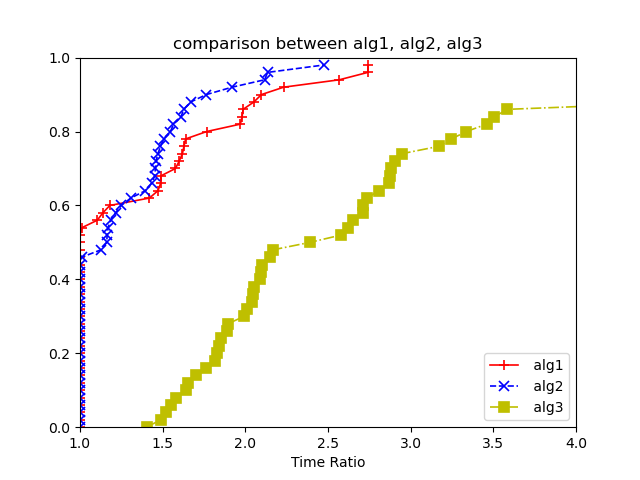

In [2]:
int main(){ 

  const int testbedLength = 50;
  int alg1results[] = { 140, 136, 187, 161, 101, 144, 130, 103, 179, 125, 183, 147, 134, 127, 173, 148, 126, 170, 122, 123, 106, 159, 166, 136, 171, 186, 165, 119, 161, 149, 131, 140, 126, 111, 159, 197, 164, 160, 168, 144, 109, 128, 144, 100, 140, 153, 131, 172, 101, 152 };
  int alg2results[] = { 166, 77 , 261, 235, 51 , 175, 151, 218, 234, 56 , 185, 74 , 156, 182, 152, 134, 269, 62 , 82 , 181, 164, 97 , 241, 85 , 105, 131, 193, 58 , 262, 92 , 51 , 94 , 142, 94 , 58 , 100, 162, 233, 263, 232, 182, 160, 217, 192, 247, 97 , 89 , 82 , 250, 226 }; 
  int alg3results[] = { 259, 250, 296, 250, 297, 254, 273, 299, 251, 292, 278, 256, 267, 265, 280, 269, 264, 293, 294, 294, 298, 263, 282, 298, 275, 284, 273, 293, 264, 265, 297, 270, 257, 277, 274, 258, 296, 291, 250, 273, 298, 275, 295, 287, 287, 263, 297, 260, 268, 287 };

    // plot points
  FILE *fptr;
  fptr = fopen("./plot/perfcsv.csv","w");
  if(fptr == NULL){
    printf("Error opening!");   
    exit(1);             
  }

  fprintf(fptr, "3, alg1, alg2, alg3\n");
  for (int i = 0; i < testbedLength; i++){
    fprintf(fptr, "test%d, %d, %d, %d\n", i, alg1results[i], alg2results[i], alg3results[i]);
  }
  fclose(fptr);

  system("python3 plot/perfprof.py -D , ./plot/perfcsv.csv ./plot/result.png -P 'comparison between alg1, alg2, alg3'\n");
  printf("$$$ipycppr_file$$$%s\n", "plot/result.png");

}

For testbeds, we will consider files provided by [TSPLIB](http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/). TSPLIB is a library that provides a standardized collection of benchmark instances for the Traveling Salesman Problem. It includes a common format for researchers and practitioners to compare the performance of different TSP algorithms. TSPLIB files corresponds to real world instances, and thus they are guaranteed to be an accurate testbed.

Sometimes, however, it will be useful to extend this collection. In such cases, we will generate random instances using the following function:

In [3]:
void generateRandomTSPFile(const char filename[], const int num_cities = 100, const int max_value = 1000){
  FILE *outfile = fopen(filename, "w");
  if (outfile == NULL) {
      printf("Error: cannot open file %s for writing.\n", filename);
      exit(1);
  }
  fprintf(outfile, "NAME: Random-%d\n", num_cities);
  fprintf(outfile, "TYPE: TSP\n");
  fprintf(outfile, "DIMENSION: %d\n", num_cities);
  fprintf(outfile, "EDGE_WEIGHT_TYPE: EUC_2D\n");
  fprintf(outfile, "NODE_COORD_SECTION\n");

  for (int i = 1; i <= num_cities; i++) {
      int x = (int) ((((double) rand()) / RAND_MAX) * max_value); // Random x-coordinate between 0 and 1000
      int y = (int) ((((double) rand()) / RAND_MAX) * max_value); // Random y-coordinate between 0 and 1000
      fprintf(outfile, "%d %d %d\n", i, x, y);
  }

  fprintf(outfile, "EOF\n");
  fclose(outfile);
}


int main(){
  system("mkdir -p data/random");
  srand(200); // Seed random number generator
  generateRandomTSPFile("./data/random/random100_2.tsp");

}

# Heuristics

## Complete algorithms

### Greed

In [4]:

void allPossibleStartsSingleThread(const TSP &tsp){

  // start clock
  clock_t start = clock();

  // try every possible starting point
  TSPSolution *minSol = new TSPSolution(&tsp);
  solveGreed(minSol);
  int minIndex = 0;

  TSPSolution *challenger = new TSPSolution(&tsp);

  for(int i = 1; i < tsp.dim; i++){
  solveGreed(challenger, i);
    if(challenger->cost < minSol->cost){
      auto tmp = minSol;
      minSol = challenger;
      challenger = tmp;
      minIndex = i;
    }
  }
  

  // stop timer
  clock_t end = clock();
  double time = (double)(end - start) / CLOCKS_PER_SEC;

  // print solution cost
  printf("starting point = %d, cost = %d\n", minIndex, minSol->cost);
  //print time
  printf("time = %f\n", time);

  // plot points
  minSol->plot(true);

}

void allPossibleStartsParallel(const TSP &tsp){
  std::mutex mtx;

  // start clock
  clock_t start = clock();

  // try every possible starting point
  TSPSolution *minSol = new TSPSolution(&tsp);
  solveGreed(minSol);
  int minIndex = 0;


  #pragma omp parallel num_threads(8)
  {
    printf("New thread\n");
    TSPSolution *challenger = new TSPSolution(&tsp);
    #pragma omp for
    for(int i = 1; i < tsp.dim; i++){
      challenger->fill();
      solveGreed(challenger, i);
      #pragma omp critical
      if(challenger->cost < minSol->cost){
        auto tmp = minSol;
        minSol = challenger;
        challenger = tmp;
        minIndex = i;
      }
    }

  }


  // stop timer
  clock_t end = clock();
  double time = (double)(end - start) / CLOCKS_PER_SEC;

  // print solution cost
  printf("starting point = %d, cost = %d\n", minIndex, minSol->cost);
  //print time
  printf("time = %f\n", time);

  // plot points
  minSol->plot(true);

}


# Metaheuristic

## VNS search

## TABU search

A simpler implementation, consider nodes to be taboos instead.

By marking . That's why we need a "TABU tenure", i.e. a policy to discard TABU nodes after a while.

# Playground

In [5]:
auto html = R""""(

<div class="widgetcontainer">
  <div class="widget" v-scope="{ count: 0 }">
    <button @click="count--">-</button>
    {{ count }}
    <button @click="count++">+</button>
  </div>

  <script>
  if(!window.INSTALL_PETITE_VUE){
    let resolve = null;
    window.INSTALL_PETITE_VUE = new Promise(r => resolve = r);
    function loadPetiteVue(){
      var script = document.createElement('script');
      script.src = 'https://unpkg.com/petite-vue';
      script.onload = resolve;
      script.onerror = () => setTimeout(loadPetiteVue, 1000)
      document.head.appendChild(script);
    }
    loadPetiteVue()
  }

  {
    // get current element right now, and mount it as soon as petite-vue is loaded
    let element = document.currentScript.previousElementSibling;
    window.INSTALL_PETITE_VUE.then(() => PetiteVue.createApp().mount(element));
  }

  </script>
</div>
)"""";


int main(){
  printf("$$$ipycppr_html_start$$$\n%s\n$$$ipycppr_html_end$$$\n", html);
}


- 
 {{ count }}
 +

In [6]:
int main(){
  printf("$$$ipycppr_html_start$$$\n%s\n$$$ipycppr_html_end$$$\n", html);
  printf("$$$ipycppr_html_start$$$\n%s\n$$$ipycppr_html_end$$$\n", html);
}

- 
 {{ count }}
 +

- 
 {{ count }}
 +

dim = 5
New thread
New thread
New thread
New thread
New thread
New thread
New thread
New thread
starting point = 0, cost = 10242
time = 0.002013


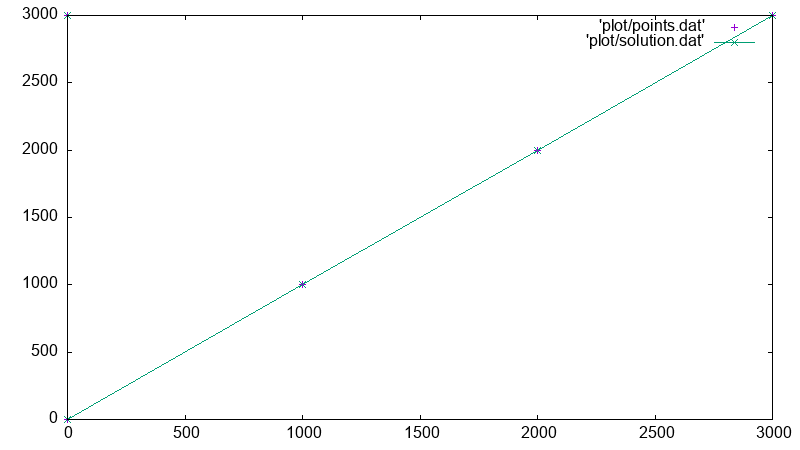

In [7]:

int main(){
  TSP tsp("./data/test.tsp");

  // initialize random seed
  srand(2306654);
  allPossibleStartsParallel(tsp);
}